In [1]:
%load_ext autoreload
%autoreload 2
from DarkMatter import *

Welcome to JupyROOT 6.26/08


### 0. Initialze for VEGAS

- This creates event list files for each dwarf in the 'RefData' directory. Whenever the source files (txt files) change, you need to run this.

In [ ]:
Likelihood.vegas.initialize()

In [ ]:
run = Likelihood.vegas.readData("ursa_minor", getRuns=True)

## 1. Instrument Response Function
- mode 0 (default): import IRFs (EA, Edisp, and PSF).
- mode 1: import the averaged effective area.
- mode 2: import the averaged energy dispersion matrix.
- mode 3: import the averaged point spread function.

In [4]:
dwarf="segue_1"
irf = ResponseFunction.VEGAS(dwarf, switch=True)

NameError: name 'ResponseFunction' is not defined

In [ ]:
irf.exposure/3600

### - Quick check: what do they look like?

In [ ]:
c = TCanvas("EA", "EA", 900,400)
c.Divide(2,1)
c.cd(1)
irf.EA.Draw()
gPad.SetLogy()
c.cd(2)
irf.Edisp.Draw("colz")
gPad.SetLogx()
gPad.SetLogy()
gPad.SetLogz()
c.Draw()
print("Total exposure time: {:.2f} hours".format(int(irf.exposure/3600.)))

### - We hava another version of VEGAS IRFs (hfit)

In [ ]:
irf_new = ResponseFunction.VEGAS.readIRFs(dwarf)

In [ ]:
c = TCanvas()
irf_new.Edisp.Draw("colz")
c.SetLogx()
c.SetLogy()
c.SetLogz()
c.Draw()


## 2. Read dark matter spectra

In [ ]:
# options: "tt", "bbar", "ee", "uu", "WW", "ZZ"
spec = Likelihood.readSpectrum(channel="gamma")

### - Quick check: what do they look like?

In [ ]:
c = TCanvas()
spec.Draw("colz")
c.SetLogy()
c.Draw()

## 3. Read On and Off region data
- Note that there are lower and upper energy cuts (100 GeV $\leq$ E $\leq$ 100 TeV). You can change these cuts; e.g.,  readData(dwarf, eLowerCut=200).

In [19]:
dwarf = "segue_1"
events = Likelihood.vegas.readData("ursa_minor", rawdata=True)

In [18]:
np.save("VEGAS_EventFile_draco.root", events)

### - Quick check: What does it look like?

In [6]:
hg_1d_nue = Likelihood.combinedCalcSignal("Segue_1", 4000, DM_spectra="HDM", general=True, package="VEGAS", channel="nue", jArray=True, jSeed="b")

[Warning] The energy bin edges may be wrong [Error 1]. Define energyEdges.


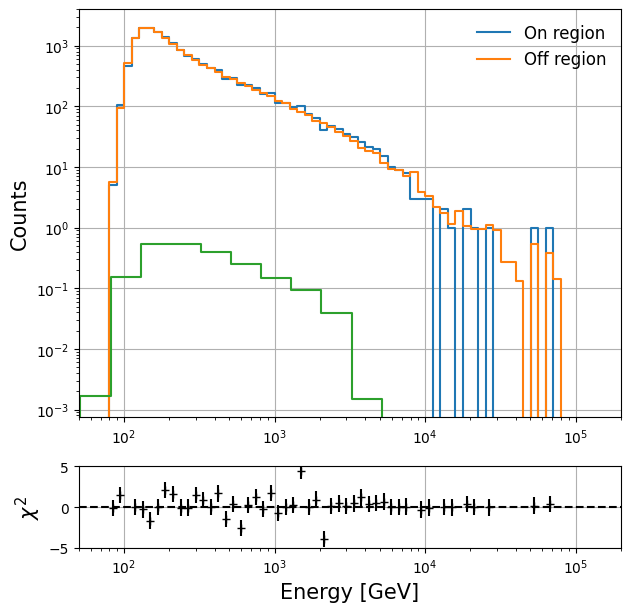

In [15]:

ax = Likelihood.vegas.plotData("Segue_1")
ax[0].step(*getArray(hg_1d_nue))

In [2]:
Likelihood.vegas.plotData("bootes")

NameError: name 'Likelihood' is not defined

### - Quick check: To check the probability density function, you can use the following function.

In [ ]:
pOn = convertToPDF(hOn)
pOff = convertToPDF(hOff)
c = TCanvas()
pOn.DrawClone("hist")
pOff.SetLineColor(2)
pOff.DrawClone("hist same")
c.SetLogx()
c.Draw()

## 4. Glance at a signal count spectrum (foleded spectrum)

### - 1D signal, $N(E)$
- Note that this spectrum is not an actual count spectrum. Here, we assume <$\sigma\nu$> = 10$^{-22}$. In other words, 

$N_s(E) = \frac{<\sigma\nu>T_{obs}}{8\pi M^2} \int\int \frac{d\Phi}{dE'}J(E')A(E')D(E|E')dE'dE$ 

$N_{s, -22}(E) = N_s(E)\times\frac{10^{-21}}{<\sigma\nu>}$

This is because <$\sigma\nu$> is a free parameter that we want to estimate with the maximum likelihood analysis.

In [ ]:
dwarf="segue_1"
irf = ResponseFunction.VEGAS.readIRFs(dwarf)

In [ ]:
dwarf = "segue_1"
M = 14987.15 
package="VEGAS"
hg_1d_d = Likelihood.calcSignal(dwarf, M, irf, package, channel="delta", jArray=True, jSeed="b", ideal=True)
hg_1d_g = Likelihood.calcSignal(dwarf, M, irf, package, channel="gamma", jArray=True, jSeed="b", ideal=True)
hg_1d_h = Likelihood.calcSignal(dwarf, M, irf, package, channel="gamma", DM_spectra="HDM", jArray=True, jSeed="b", ideal=True)

In [ ]:
hg_1d_g = Likelihood.calcSignal(dwarf, M, irf, package, channel="tt", jArray=True, useScipy=False, jSeed="b", ideal=True)

Here's the values from the PPPC file: M=15000 GeV log10x=0  dN/dx=61.7401. I used an input mass of 14987.15 GeV, my final interpolated value of dN/dx at x=1 was 61.35428. Predicted signal events for a naive delta was 9.2, for PPPC was 15.9

In [ ]:
plt.step(*getArray(hg_1d_d), where="mid", label=f"delta ({sum(getArray(hg_1d_d)[1])})")
plt.step(*getArray(hg_1d_g), where="mid", label=f"PPPC ({sum(getArray(hg_1d_g)[1])})")
plt.step(*getArray(hg_1d_h), where="mid", label=f"HDM ({sum(getArray(hg_1d_h)[1])})")
plt.xscale("log")
plt.yscale("log")
plt.grid()
plt.legend()

### - 2D signal, $N(E, \theta)$

$N_s(E, \theta) = \frac{<\sigma\nu>T_{obs}}{8\pi M^2} \int\int\int \frac{d\Phi}{dE'}J(E', \theta)A(E')D(E|E')dE'dEd\theta$

$N_{s, -22}(E, \theta) = N_s(E, \theta) \times \frac{10^{-22}}{<\sigma\nu>}$

In [ ]:
hg_2d = Likelihood.combinedCalcSignal(dwarf, M, package=package, decay="tt", addTheta=True)

### - Quick check: What does it look like?

In [ ]:
c = TCanvas("Signal", "Signal", 900,400)
c.Divide(2,1)
c.cd(1)
hg_1d.Draw("hist")
gPad.SetLogx()
c.cd(2)
hg_2d.Draw("colz")
gPad.SetLogx()
c.Draw()

### - Quick check: Are 1D and 2D signals consistent?

In [ ]:
Likelihood.check2Dsignal(hg_1d, hg_2d)              # Compare the total counts from 1D and 2D.
Likelihood.check2Dsignal(hg_1d, hg_2d, chi=True)    # Compare 1D spectra with chi square.

h2to1d = Likelihood.convert2Dsignal(hg_2d)
x1, y1 = getArray(hg_1d)
x2, y2 = getArray(h2to1d)

f, ax = plt.subplots(2,1, figsize=(7, 7), gridspec_kw={'height_ratios':[5,1]})
ax[0].plot(x1, y1, label="1D")
ax[0].plot(x2, y2, label="2D")
ax[0].axvline(M, c="r", ls="--", label="Mass")
ax[0].set_xscale("log")
ax[0].set_xlim(50, 2e5)
ax[0].set_ylabel("Counts", fontsize=15)
ax[0].legend(fontsize=12, loc=1)
ax[0].grid()

ax[1].scatter(x1, (y1-y2)/y1*100, marker="+", c="k")
ax[1].set_xscale("log")
ax[1].set_xlabel("Energy [GeV]", fontsize=15)
ax[1].set_ylabel(r"Ratio [%]", fontsize=15)
ax[1].set_xlim(50, 2e5)
ax[1].set_ylim(0, 1)
ax[1].axhline(0, color="k", ls="--")
ax[1].grid()

### - Quick check: Probability density function

In [ ]:
pg_1d = convertToPDF(hg_1d)
pg_2d = convertToPDF(hg_2d) 
c = TCanvas("PDF", "PDF", 900,400)
c.Divide(2,1)
c.cd(1)
pg_1d.Draw("hist")
gPad.SetLogx()
c.cd(2)
pg_2d.Draw("hist colz")
gPad.SetLogx()
c.Draw()

## 5. Maximum Likelihood Estimation (MLE)

$$\mathcal{L} = \frac{(g+\alpha b)^{N_{on}}e^{-(g+\alpha b)}}{N_{on}!}\frac{b^{N_{off}}e^{-b}}{N_{off}!}\prod P_i(E_i|M, <\sigma\nu>)$$

$$P_i(E_i|M, <\sigma\nu>) = \frac{\alpha b p_{off}(E_i)+gp_{on}(E_i)}{\alpha b+g}$$

$$p_{on}(E) = \frac{1}{g}\frac{dg}{dE}, \,\,\,\,\text{where}\,\,\frac{dg}{dE}=\frac{<\sigma\nu>T_{obs}}{8\pi M^2} \int \frac{d\Phi}{dE'}J(E')A(E')D(E|E')dE'$$

$$log\mathcal{L} = N_{off}logb-g-(1+\alpha)b+\sum log(\alpha b p_{off, i}+g p_{on, i})$$

Note that an upper limit is estimated by following two methods.
- method 1 (default): try to calculate an upper limit by using a contour ($\Delta \mathcal{L} = 1.645$) between b and $<\sigma\nu>$. If it fails (mostly due to a lower bound, an upper limit is estimated from the likelihood profile. 
- method 2: Use the likelihood profile ($\Delta \mathcal{L} = 1.645$) to estimate an upper limit

Note that TS value can be negative in this analysis (in principle, it should be NOT). In the null hypothesis, $<\sigma\nu>$ = 0. However, in MLE (the alternative hypothesis), there are upper and lower bounds so that $\sigma\nu$ can not be zero. In other words, the negative TS is due to the limit of the lower bound. 

In [40]:
dwarf = "bootes"
M =  1.63789371e+06

mle = Likelihood.MLE(dwarf, M,  package="VEGAS", decay="ee", verbose=True, DM_spectra="HDM", jSeed="b") 

[Log] Initializing... (VEGAS)
[Log] Step 1: Instrument response functions are imported.
[Log] Step 2: Events are loaded.
[Log] Step 3: A source model is loaded.
[Log] Step 4: A temporary file for minimization is generated.
[Log] Initialization is done. Run minuite.


In [41]:
mle.minuit(upperLimit=True)

[Log, Result] TS = 1.35 (M=1637894 GeV)
[Log, Result] <σν> (95& upper limit) = 10^(-17.227) (equivalent to 5.93e-18)
[Log, Result] b = 10798 +/- 139 (null value: 10802)
 MNCONT UNABLE TO FIND FOUR POINTS.


Warning in <TMinuit::Contour>: Cannot find more than 4 points, no TGraph returned


### - Quick check: Spectral energy distribution (folded spectrum)

In [ ]:
mle.plotSED()

### - Quick check: Methods for estimating an upper limit

- Method 1: Contour

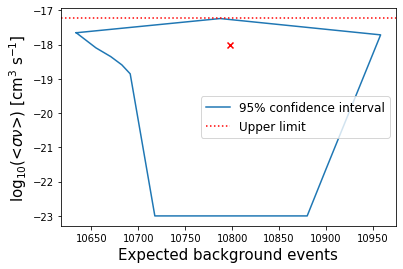

 FUNCTION MUST BE MINIMIZED BEFORE CALLING SCAn      


Warning in <TMinuit::Contour>: Returning a TGraph with 12 points only


In [43]:
mle.plotContour(upperLimit=True)

- Method 2: Profile likelihood

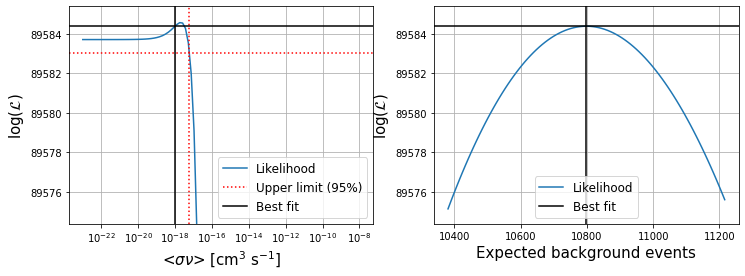

In [42]:
mle.plotProfileLikelihood(upperLimit=True)

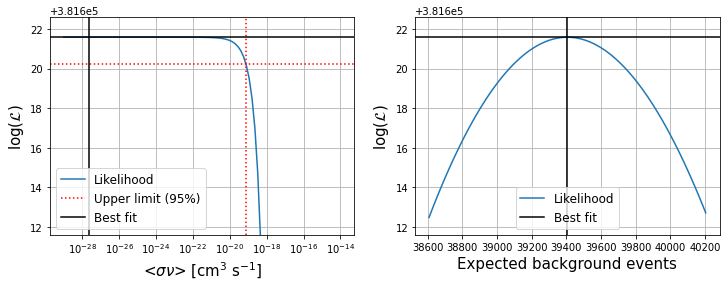

In [39]:
mle.plotProfileLikelihood(upperLimit=True)

## 6. Generate an upper limit curve

In [ ]:
x, y = JProfile.generateConvolvedJ(dwarf, package, irf=irf, return_array=True, seed = "b", verbose=False, save_root=False)

In [ ]:
irf = ResponseFunction.VEGAS.readIRFs("draco")

In [ ]:
plotRoot(irf.PSF)

In [ ]:
mass = np.logspace(3, 7.5, 8)
runs = 300
chan = ["ee", "uu", "tt", "ttbar", "bbar", "WW", "ZZ", "gamma", "nue"]

uls = {}

#mass = np.asarray([1000]+mass[mass>1000].tolist())


    
for c in chan:
#    mass4gamma = const.mass4gamma_vegas
#    mass = mass4gamma[(mass4gamma>mass[0])*(mass4gamma<mass[-1])]

    for m in mass:
        uls[int(m)] = []
#     for d in ["segue_1", "bootes", "draco", "ursa_minor"]:
#         Likelihood.calcUpperLimits(d, c, package="VEGAS", method=2, DM_spectra="HDM",
#                            mass=mass, addTheta=False, returnTS=True)
    for i in trange(runs):
        
        ul = Likelihood.combinedUpperLimits(c, mass=mass, package="VEGAS", method=2, averagedIRF=True, 
                                   DM_spectra="HDM", returnTS=True, sys=True, verbosity=False)
        for u in ul:
            uls[int(u[0])].append(u[1])

    np.save(const.OUTPUT_DIR+f"VEGAS_stacked_sys_{c}_three", uls)

In [50]:
help(JProfile.dwarfParam)

Help on function dwarfParam in module DarkMatter.JProfile.profile:

dwarfParam(dwarf)



In [49]:
JProfile.dwarfParam("segue_1")

<Table length=6314>
         rhos             log10(rs)      ...        gamma       
       float64             float64       ...       float64      
--------------------- ------------------ ... -------------------
 0.006725238089396526  2.644507496291486 ...  0.7912501338849813
 0.024640295401906057 2.9539840055947817 ... 0.35302592037228503
 0.048728187506655786  3.861014146580591 ...  0.4423644460132378
   1.8001349425374604 1.8876484840085415 ... 0.34387346958674525
   0.0666288712075249  4.819647539557109 ...  0.4741174693936289
  0.19120575324915487  2.929721798741474 ...  0.6223190000052338
                  ...                ... ...                 ...
  0.00824074564462069  3.320051682331922 ...  1.1638716526058923
 0.004929783448696701 3.6152088908459374 ...   1.133874266739689
 0.016421068511855014 3.1668314305115874 ...   1.173785739706441
 0.016421068511855014 3.1668314305115874 ...   1.173785739706441
 0.020051650425044306  3.330440647121801 ...  1.1571433355719905
0.0011801227202388918  4.102341125523324 ...  1.1675150362091784
 0.005244973975213006 3.8129736085981136 ...  1.0762885418398322

In [6]:
chan = ["nue"]
mass = np.logspace(3, 7.5, 8)
for c in chan:
    ul = Likelihood.combinedUpperLimits(c, mass=mass, package="VEGAS", method=2, averagedIRF=True, 
                                   DM_spectra="HDM", returnTS=True, jSeed="b", general=True, verbosity=True)


[Log] Package      : VEGAS
[Log] # of Dwarfs  : 4
[Log] Channel      : nue
[Log] Dimention    : 1
[Log] Background   : None
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 1000 GeV
[Log] Maximum mass : 31623 TeV


  0%|          | 0/8 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/VEGAS_stacked_nue_1D_null.npy'


In [34]:
mass = np.logspace(3, 7.5, 8)
runs = 300
chan =["ee", "uu", "tt", "ttbar", "bbar", "WW", "ZZ", "gamma", "nue"]
for c in chan:
    for d in [ "bootes"]:
        Likelihood.calcUpperLimits(d, c, package="VEGAS", method=2, DM_spectra="HDM",
                           mass=mass, addTheta=False, returnTS=True, jSeed="b")
#    ul = Likelihood.combinedUpperLimits(c, mass=mass, package="VEGAS", method=2, averagedIRF=True, 
#                                       DM_spectra="HDM", jSeed="b", returnTS=True)

[Log] Package      : VEGAS
[Log] Dwarf        : bootes
[Log] Channel      : ee
[Log] Dataset      : Point-like
[Log] Dimention    : 1
[Log] Background   : None
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 1000 GeV
[Log] Maximum mass : 31623 TeV


  0%|          | 0/8 [00:00<?, ?it/s]

-8.20952991489321e-05
-1.09695247374475e-06
0.793517135840375
1.8425102866603993
1.4717040751711465
0.9598880968987942
0.1775805986544583
0.020893017965136096
[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/VEGAS_bootes_ee_1D_null_pt.npy'
[Log] Package      : VEGAS
[Log] Dwarf        : bootes
[Log] Channel      : uu
[Log] Dataset      : Point-like
[Log] Dimention    : 1
[Log] Background   : None
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 1000 GeV
[Log] Maximum mass : 31623 TeV



KeyboardInterrupt



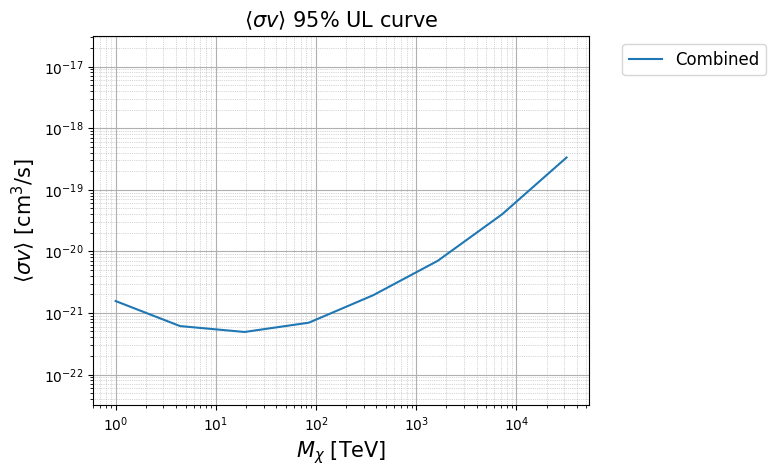

In [22]:
Likelihood.plotULcurve(f"VEGAS_stacked_nue_1D_null", label="Combined", units="TeV")

In [26]:
ts = np.load(const.OUTPUT_DIR+"/VEGAS_stacked_nue_1D_null_exp.npy", allow_pickle=True).item()

In [31]:
 np.load(const.OUTPUT_DIR+"/VEGAS_stacked_nue_1D_null_ts.npy", allow_pickle=True)

array([[1.00000000e+03, 3.28502490e-01],
       [2.09617999e+03, 4.22393536e-01],
       [4.39397056e+03, 5.37409098e-01],
       [9.21055318e+03, 3.84802421e-01],
       [1.93069773e+04, 8.29999615e-03],
       [4.04708995e+04, 8.31414852e-03],
       [8.48342898e+04, 8.35255533e-03],
       [1.77827941e+05, 7.91407470e-03],
       [3.72759372e+05, 8.06878135e-03],
       [7.81370738e+05, 4.71591204e-03],
       [1.63789371e+06, 8.24378710e-03],
       [3.43332002e+06, 4.92787641e-03],
       [7.19685673e+06, 8.00939929e-03],
       [1.50859071e+07, 8.39354191e-03],
       [3.16227766e+07, 8.39272700e-03]])

In [ ]:
plt.hist()

In [ ]:
Likelihood.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(1e-26, 2e-18)

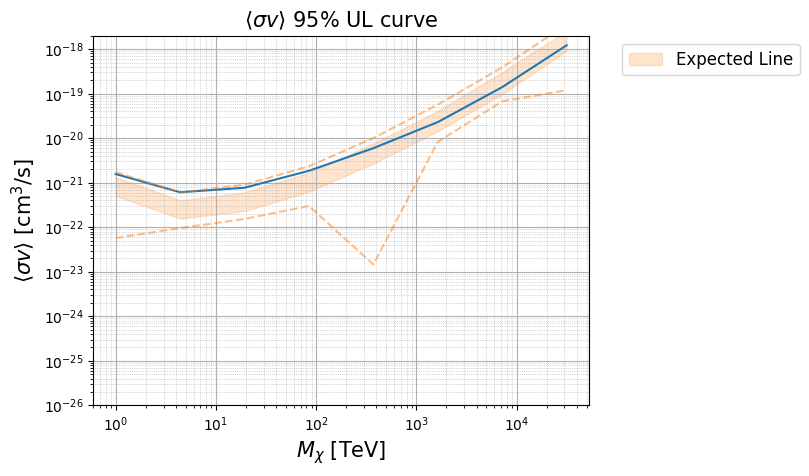

In [15]:
Likelihood.plotULcurve("VEGAS_stacked_nue_1D_null", units="TeV")
Likelihood.plotExpULcurve("VEGAS_stacked_nue_1D_null_exp", units="TeV")
plt.ylim(1e-26, 2e-18)

In [14]:
mass = np.logspace(3, 7.5, 8)
for c in ["nue"]:
    ul = Likelihood.combinedExpectedUpperLimits(c, mass=mass, dwarfs = ["Segue_1", "Bootes_I", "Draco", "UMi"], 
                                    package="VEGAS", method=2, averagedIRF=True, runs=300,
                                    DM_spectra="HDM", jSeed="b", returnTS=True, general=True)

[Log] Package      : VEGAS
[Log] # of Dwarfs  : 4
[Log] Channel      : nue
[Log] Dimention    : 1
[Log] Background   : None
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 1000 GeV
[Log] Maximum mass : 31623 TeV


  0%|          | 0/8 [00:00<?, ?it/s]

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).


/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).


/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

In [ ]:
ul = Likelihood.combinedUpperLimits("tt", mass=mass, package="VEGAS", method=2, averagedIRF=True, 
                                       DM_spectra="HDM", jSeed="b")

In [ ]:
c = "tt"
for c in chan:
    
    Likelihood.plotExpULcurve(f"VEGAS_stacked_{c}_1D_null_exp", units="TeV", add_mean=True)
    Likelihood.plotULcurve(f"VEGAS_stacked_{c}_1D_null", label="Combined", units="TeV")
    plt.show(block=False)

In [ ]:
ls /Users/dtak/Research/DarkMatter/Output/VEGAS_stacked_tt_1D*

In [ ]:
ts_dist = np.load(const.OUTPUT_DIR+"VEGAS_stacked_tt_1D_null_exp_ts_exp.npy", allow_pickle=True).item()

In [ ]:
ts_cont = []
for ts in ts_dist:
    ts_cont.append([ts, np.percentile(ts_dist[ts], 90), np.percentile(ts_dist[ts], 95)])
    

In [ ]:
ts_cont = np.array(ts_cont)

In [ ]:
plt.plot(ts_cont[:,0], ts_cont[:,1])
plt.plot(ts_cont[:,0], ts_cont[:,2])
plt.xscale("log")

In [ ]:
ls '/Users/dtak/Research/DarkMatter/Output/'

In [ ]:
Likelihood.plotExpULcurve()

In [ ]:
const.OUTPUT_DIR

In [ ]:
ls /Users/dtak/Research/DarkMatter/Output/*exp*

In [ ]:
np.save(const.OUTPUT_DIR+f"VEGAS_stacked_sys_{c}_three", uls)

In [ ]:
uls = np.load(const.OUTPUT_DIR+f"VEGAS_stacked_sys_{c}_three.npy", allow_pickle=True).item()

In [ ]:
uls = np.load(const.OUTPUT_DIR+f"VEGAS_stacked_sys_{c}_three.npy", allow_pickle=True).item()

In [ ]:
uls_add = np.load(const.OUTPUT_DIR+f"VEGAS_stacked_sys_{c}_three_add.npy", allow_pickle=True).item()

In [ ]:
for k in uls.keys():
    uls[k] += uls_add[k]

In [ ]:
len(uls[1190])

In [ ]:
#dwarf = "segue_1"

channel = "tt"
mass = np.logspace(2, 7.5, 15)
#filename = "sanity_check_HDM"

chan = ["ttbar", "bbar", "WW", "ZZ", "gamma"]
for c in chan:

    Likelihood.(c,  mass=mass, package="VEGAS", method=2, averagedIRF=True, 
                               DM_spectra="HDM", returnTS=True)

In [ ]:
for d in ["segue_1", "ursa_minor", "draco", "bootes", "stacked"]:
    try:
        uls = np.load(const.OUTPUT_DIR+f"VEGAS_{d}_gamma_1D_null.npy")
    except:
        uls = np.load(const.OUTPUT_DIR+f"VEGAS_{d}_gamma_1D_null_pt.npy")

    new = []
    j = 1
    for i in range(len(uls)):
        if j ==0:
            new.append(uls[i])
            j = 1
        else:
            j=0

    new = np.asarray(new)

    np.save(const.OUTPUT_DIR+f"VEGAS_{d}_gamma_1D_null_pt_selected.npy", new)

uls_stacked = np.load(const.OUTPUT_DIR+f"VEGAS_stacked_gamma_1D_null_pt_selected.npy")
uls_segue_1 = np.load(const.OUTPUT_DIR+f"VEGAS_segue_1_gamma_1D_null_pt_selected.npy")

u_new = []
for u1, u2 in zip(uls_stacked, uls_segue_1):
    if u1[1]> u2[1]:
        u_new.append(u2)
    else:
        u_new.append(u1)
        
    np.save(const.OUTPUT_DIR+f"VEGAS_stacked_gamma_1D_null_pt_selected.npy", u_new)

In [ ]:
c = "gamma"
Likelihood.plotULcurve(f"VEGAS_segue_1_{c}_1D_null_pt_selected", label="Segue 1", ls="-.", units="TeV")
Likelihood.plotULcurve(f"VEGAS_draco_{c}_1D_null_pt_selected", label="Draco", ls="-.", units="TeV")
Likelihood.plotULcurve(f"VEGAS_bootes_{c}_1D_null_pt_selected", label="Bootes", ls="-.", units="TeV")
Likelihood.plotULcurve(f"VEGAS_ursa_minor_{c}_1D_null_pt_selected", label="Ursa minor", ls="-.", units="TeV")
Likelihood.plotULcurve(f"VEGAS_stacked_{c}_1D_null_pt_selected", label="Combined", units="TeV")
plt.ylim(1e-25, 1e-17)
plt.legend(loc=2, fontsize=12)
ax = plt.gca()
plt.text(0.95, 0.1, r"{} annihilation channel".format(cl), fontsize=15, ha="right", transform=ax.transAxes)
#plt.text(0.95, 0.2, r"Segue 1", fontsize=15, ha="right", transform=ax.transAxes)
plt.title("")

plt.savefig("VEGAS_gamma.pdf")
plt.show(block=False)

In [4]:
mass = np.logspace(3, 7.5, 8)

In [7]:
mass4gamma = const.mass4gamma_vegas
mass = mass4gamma[(mass4gamma>mass[0])*(mass4gamma<mass[-1])]


In [ ]:
#dwarf = "segue_1"
c = "gamma"
mass = np.logspace(2, 7.5, 15)

In [ ]:
plt.style.use("default")

In [ ]:
### Likelihood.plotULcurve("VEGAS_segue_1_tt_1D_null_pt", label="This work (PPPC; 92.0 hrs)", units="TeV")
Likelihood.plotULcurve("sanity_check_HDM", label="This work (92.0 hrs)", units="TeV")
Likelihood.plotULcurve("VERITAS", units="TeV", label="VERITAS (2017; 92.0 hrs)")
Likelihood.plotULcurve("MAGIC", units="TeV", label="MAGIC (2014; 157.9 hrs)")
Likelihood.plotULcurve("HAWC", units="TeV", label="HAWC (2017; 507 days)")
Likelihood.plotExpULcurve(filename="vts_like_tt", label="Tak et al. (2022; 50 hrs)", units="TeV", ls="-.", mean_only=True)
plt.ylim(8e-25, 1e-17)
plt.legend(loc=2, fontsize=12)
ax = plt.gca()
plt.text(0.95, 0.1, r"$\tau^{+}\tau^{-}$ annihilation channel", fontsize=15, ha="right", transform=ax.transAxes)
plt.text(0.95, 0.2, r"Segue 1", fontsize=15, ha="right", transform=ax.transAxes)
plt.title("")
plt.savefig("sanity_check.pdf")

In [ ]:
ul_ben_ew = np.load(REF_DIR+"draco_Ben_EW.npy")
ul_ben_ml = np.load(REF_DIR+"draco_Ben.npy")

plt.plot(ul_ben_ew[:,0], ul_ben_ew[:,1], label="VEGAS (Ben, EW)")
plt.plot(ul_ben_ml[:,0], ul_ben_ml[:,1], label="VEGAS (Ben, MLE)")

Likelihood.plotULcurve("./output/VEGAS_draco_tt_1D.npy", 
                       label="VEGAS (1D)")
Likelihood.plotULcurve("./output/Ev_draco_tt_1D.npy", 
                       label="VEGAS (1D)")

In [ ]:
ul_magic = np.load(REF_DIR+"segue_1_MAGIC.npy")
ul_ben_ml = np.load(REF_DIR+"segue_1_Ben.npy")
plt.plot(ul_magic[:,0], ul_magic[:,1], ls="-.", label="MAGIC")

plt.plot(ul_ben_ml[:,0], ul_ben_ml[:,1], label="VEGAS (Ben)")

Likelihood.plotULcurve("./output/VEGAS_segue_1_tt_1D.npy", 
                       label="VEGAS (1D)")

In [ ]:
ul_ben_ml = np.load(REF_DIR+"segue_1_Ben.npy")

plt.plot(ul_ben_ml[:,0], ul_ben_ml[:,1], label="VEGAS (Ben)")

Likelihood.plotULcurve("./output/VEGAS_segue_1_tt_1D.npy", 
                       label="VEGAS (1D)")


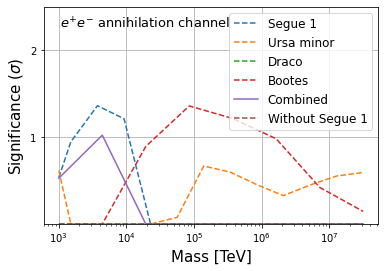

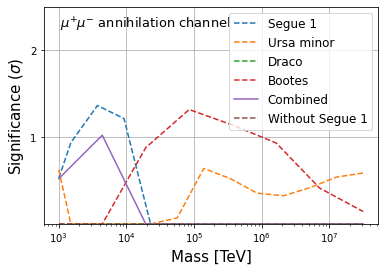

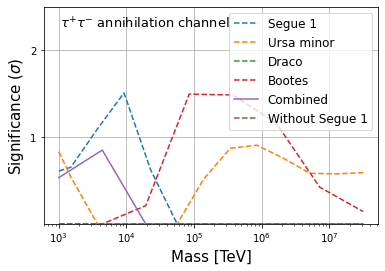

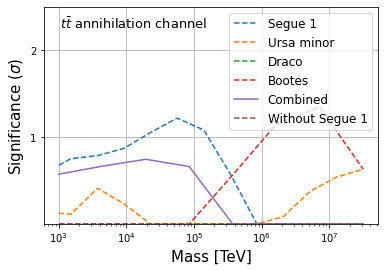

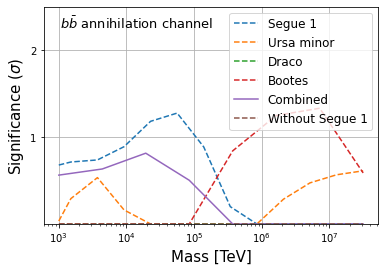

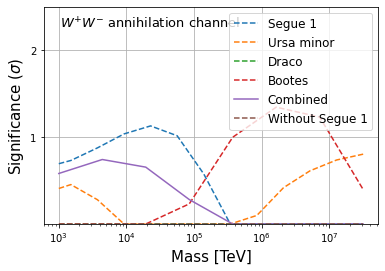

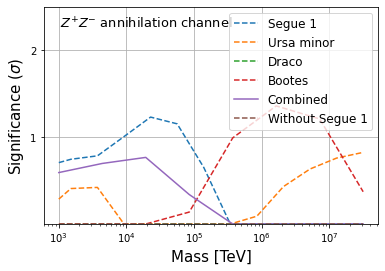

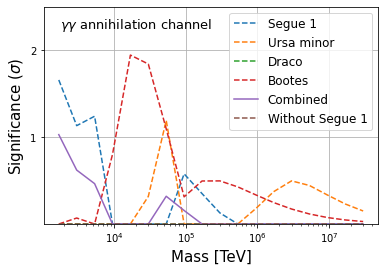

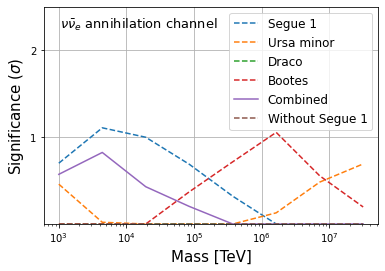

In [33]:
chan = ["ee", "uu", "tt", "ttbar", "bbar", "WW", "ZZ", "gamma", "nue"]

chan_lab = [r"$e^{+}e^{-}$", r"$\mu^{+}\mu^{-}$", r"$\tau^{+}\tau^{-}$",
            r"$t\bar{t}$", r"$b\bar{b}$",
            r"$W^{+}W^{-}$", r"$Z^{+}Z^{-}$", r"$\gamma\gamma$", r"$\nu \bar{\nu}_e$"]


for c, cl in zip(chan, chan_lab):
    for d, dl in zip(["segue_1", "ursa_minor", "draco", "bootes", "stacked", "without"], 
                     ["Segue 1", "Ursa minor", "Draco", "Bootes", "Combined", "Without Segue 1"]):
        
        if d == "without":
            ts = np.load(const.OUTPUT_DIR+f"without_segue1_{c}.npy")
        else:
            try:
                ts = np.load(const.OUTPUT_DIR+f"VEGAS_{d}_{c}_1D_null_pt_ts.npy")
            except:
                try:
                    ts = np.load(const.OUTPUT_DIR+f"VEGAS_{d}_{c}_1D_null_ts.npy")                    
                except:
                    try:
                        ts = np.load(const.OUTPUT_DIR+f"VEGAS_{d}_{c}_1D_nullts.npy")    
                    except:
                        try:
                            ts = np.load(const.OUTPUT_DIR+f"VEGAS_{d}_{c}_1D_null_ptts.npy")
                        except:
                            print("missing", d, c)
                            continue
                        
        ts[:,1][ts[:,1]<0] = 0
        
        if dl == "Combined":
            plt.plot(ts[:,0], np.sqrt(ts[:,1]), label=dl)
        else:
            plt.plot(ts[:,0], np.sqrt(ts[:,1]), label=dl, ls="--")
        plt.xscale("log")

    plt.legend(loc=1, fontsize=12)
    ax = plt.gca()
    plt.text(0.05, 0.9, r"{} annihilation channel".format(cl), fontsize=13, ha="left", transform=ax.transAxes)
    plt.xlabel("Mass [TeV]", fontsize=15)
    plt.ylabel(r"Significance ($\sigma$)", fontsize=15)
    plt.yticks([0, 1, 2])
    plt.ylim(1e-5, 2.5)
    #plt.yscale("log")
    plt.grid()
#    plt.savefig(f"sig_{c}.pdf")
    plt.show(block=False)

In [25]:
mass = np.logspace(3, 7.5, 15)
for c in ["ee", "uu", "tt", "ttbar", "bbar", "WW", "ZZ", "gamma", "nue"]:
    ul = Likelihood.combinedUpperLimits(c, mass=mass, dwarfs = ["Segue_1", "Bootes_I", "Draco", "UMi"], package="VEGAS", method=2, averagedIRF=True, 
                                       DM_spectra="HDM", jSeed="b", general=True, filename=f"with_segue1_{c}_mcut", returnTS=True)

[Log] Package      : VEGAS
[Log] # of Dwarfs  : 4
[Log] Channel      : ee
[Log] Dimention    : 1
[Log] Background   : None
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 1000 GeV
[Log] Maximum mass : 31623 TeV


  0%|          | 0/15 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/with_segue1_ee_mcut.npy'
[Log] Package      : VEGAS
[Log] # of Dwarfs  : 4
[Log] Channel      : uu
[Log] Dimention    : 1
[Log] Background   : None
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 1000 GeV
[Log] Maximum mass : 31623 TeV


  0%|          | 0/15 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/with_segue1_uu_mcut.npy'
[Log] Package      : VEGAS
[Log] # of Dwarfs  : 4
[Log] Channel      : tt
[Log] Dimention    : 1
[Log] Background   : None
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 1000 GeV
[Log] Maximum mass : 31623 TeV


  0%|          | 0/15 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/with_segue1_tt_mcut.npy'
[Log] Package      : VEGAS
[Log] # of Dwarfs  : 4
[Log] Channel      : ttbar
[Log] Dimention    : 1
[Log] Background   : None
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 1000 GeV
[Log] Maximum mass : 31623 TeV


  0%|          | 0/15 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/with_segue1_ttbar_mcut.npy'
[Log] Package      : VEGAS
[Log] # of Dwarfs  : 4
[Log] Channel      : bbar
[Log] Dimention    : 1
[Log] Background   : None
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 1000 GeV
[Log] Maximum mass : 31623 TeV


  0%|          | 0/15 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/with_segue1_bbar_mcut.npy'
[Log] Package      : VEGAS
[Log] # of Dwarfs  : 4
[Log] Channel      : WW
[Log] Dimention    : 1
[Log] Background   : None
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 1000 GeV
[Log] Maximum mass : 31623 TeV


  0%|          | 0/15 [00:00<?, ?it/s]

Negative dN/dx values were set to 0 for the following x:
[0.96108321 0.9620324  0.96298159 0.96393078 0.96487997 0.96582916
 0.96677835 0.96772754 0.96867673 0.96962592 0.97057511 0.9715243
 0.97247349 0.97342268 0.98481296 0.98576215 0.98671134 0.98766053
 0.98860972 0.99620324]
Caution around these values should be taken
A comparison with linear interpolation is recommended
Negative dN/dx values were set to 0 for the following x:
[0.96108321 0.9620324  0.96298159 0.96393078 0.96487997 0.96582916
 0.96677835 0.96772754 0.96867673 0.96962592 0.97057511 0.9715243
 0.97247349 0.97342268 0.98481296 0.98576215 0.98671134 0.98766053
 0.98860972 0.99620324]
Caution around these values should be taken
A comparison with linear interpolation is recommended
Negative dN/dx values were set to 0 for the following x:
[0.96108321 0.9620324  0.96298159 0.96393078 0.96487997 0.96582916
 0.96677835 0.96772754 0.96867673 0.96962592 0.97057511 0.9715243
 0.97247349 0.97342268 0.98481296 0.98576215 0.98671

  0%|          | 0/15 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/with_segue1_ZZ_mcut.npy'
[Log] Package      : VEGAS
[Log] # of Dwarfs  : 4
[Log] Channel      : gamma
[Log] Dimention    : 1
[Log] Background   : None
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 1000 GeV
[Log] Maximum mass : 31623 TeV


  0%|          | 0/18 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/with_segue1_gamma_mcut.npy'
[Log] Package      : VEGAS
[Log] # of Dwarfs  : 4
[Log] Channel      : nue
[Log] Dimention    : 1
[Log] Background   : None
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 1000 GeV
[Log] Maximum mass : 31623 TeV


  0%|          | 0/15 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/with_segue1_nue_mcut.npy'
 NEW MINIMUM FOUND.  GO BACK TO MINIMIZATION STEP.
                                                  V
                                                  V
                                                  V
                                               VVVVVVV
                                                VVVVV
                                                 VVV
                                                  V



Error in <TFile::TFile>: file /Users/dtak/Research/DarkMatter/Output//VEGAS_IRFs_Bootes_I.root does not exist
Error in <TFile::TFile>: file /Users/dtak/Research/DarkMatter/Output//VEGAS_IRFs_UMi.root does not exist
Warning in <TROOT::Append>: Replacing existing TH1: hOn (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hOff (Potential memory leak).
cp: /Users/dtak/Research/DarkMatter/Output/with_segue1_ee_mcut.npy: No such file or directory
Error in <TFile::TFile>: file /Users/dtak/Research/DarkMatter/Output//VEGAS_IRFs_Bootes_I.root does not exist
Error in <TFile::TFile>: file /Users/dtak/Research/DarkMatter/Output//VEGAS_IRFs_UMi.root does not exist
cp: /Users/dtak/Research/DarkMatter/Output/with_segue1_uu_mcut.npy: No such file or directory
Error in <TFile::TFile>: file /Users/dtak/Research/DarkMatter/Output//VEGAS_IRFs_Bootes_I.root does not exist
Error in <TFile::TFile>: file /Users/dtak/Research/DarkMatter/Output//VEGAS_IRFs_UMi.root does not exist
cp: 

## Final plot

### Fig 1

In [5]:
from DarkMatter.Likelihood.plotting import *

In [12]:
from DarkMatter import *

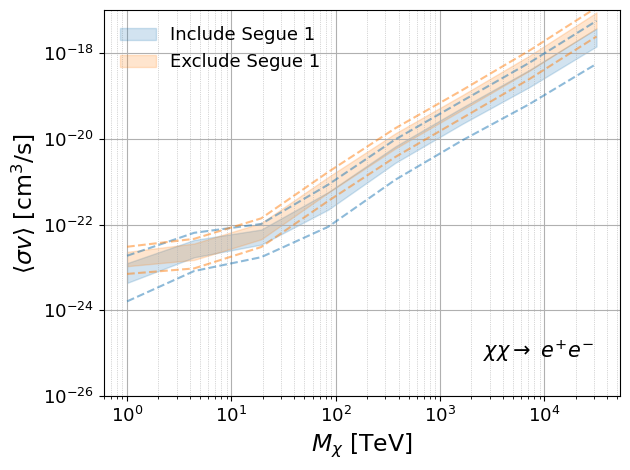

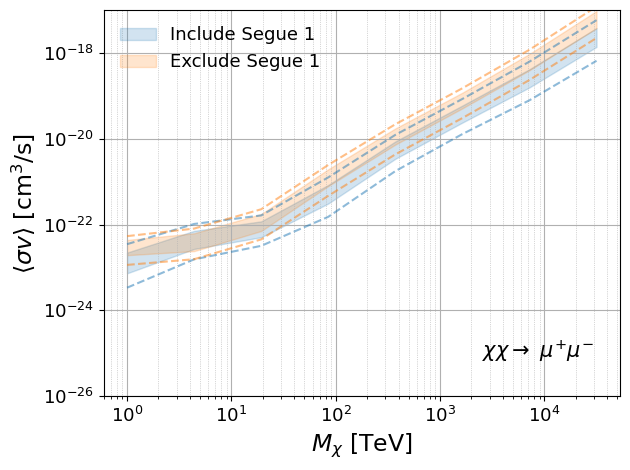

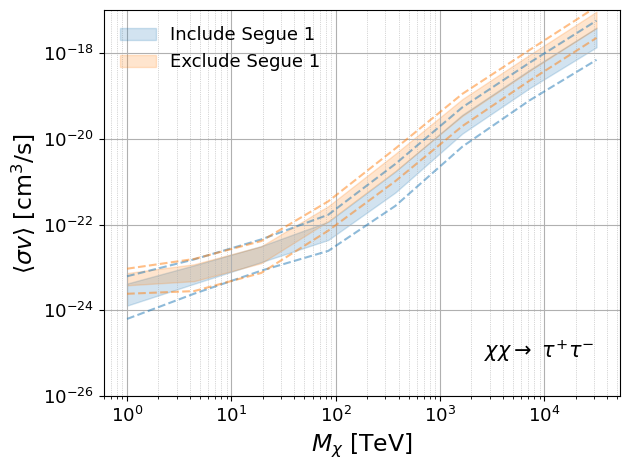

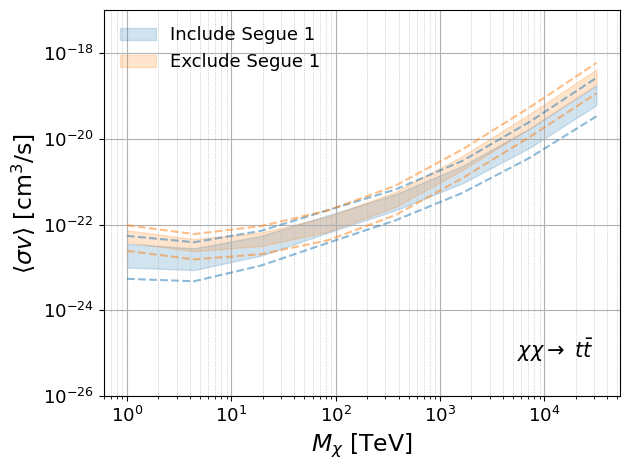

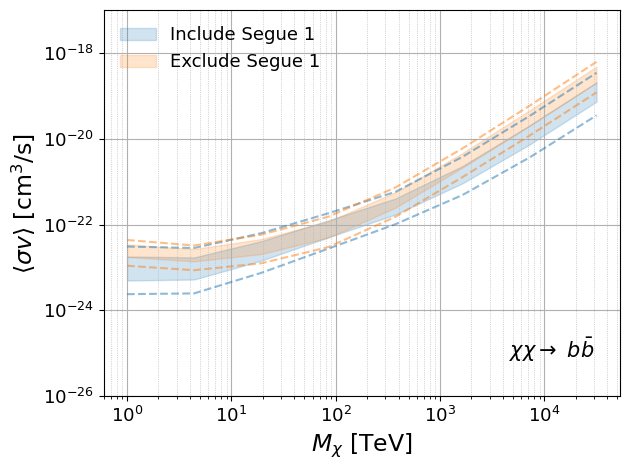

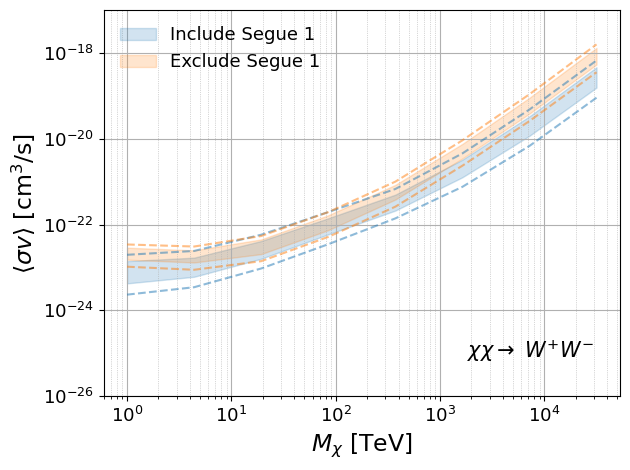

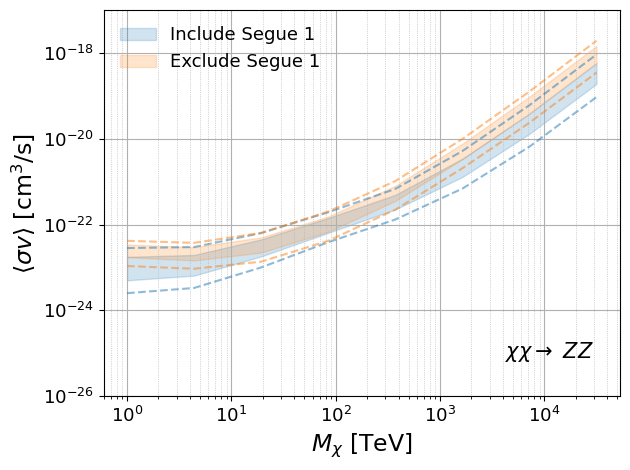

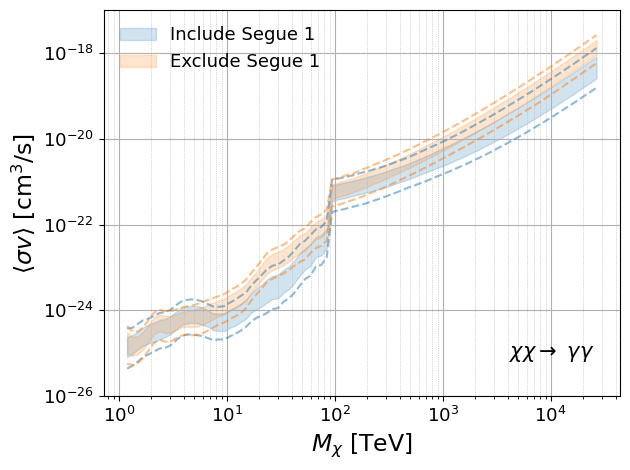

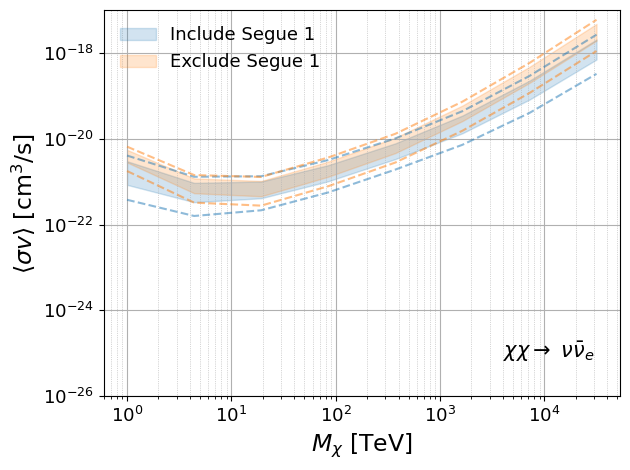

In [7]:

chan = ["ee", "uu", "tt", "ttbar", "bbar", "WW", "ZZ", "gamma", "nue"]
chan_lab = [r"$e^{+}e^{-}$", r"$\mu^{+}\mu^{-}$", r"$\tau^{+}\tau^{-}$",
            r"$t\bar{t}$", r"$b\bar{b}$",
            r"$W^{+}W^{-}$", r"$ZZ$", r"$\gamma\gamma$", r"$\nu \bar{\nu}_e$"]

ls = ["-", "-", "-", "--", "--", ":",":", "-.", "-."]

for c, cl in zip(chan, chan_lab):
#    Likelihood.plotULcurve(f"VEGAS_stacked_{c}_1D_null", ls="-", color="b")
    plotExpULcurve(f"VEGAS_stacked_sys_{c}.npy", label="Include Segue 1", units="TeV")
    plotExpULcurve(f"VEGAS_stacked_sys_{c}_three", label="Exclude Segue 1", units="TeV")
#    Likelihood.plotExpULcurve(f"VEGAS_stacked_{c}_1D_null_exp", label=r"H$_0$")
    ax = plt.gca()
    plt.text(0.95, 0.1, r"$\chi\chi \rightarrow$ {}".format(cl), fontsize=15, ha="right", transform=ax.transAxes)
    plt.title("")
    plt.legend(loc=2, fontsize=13, frameon=False)
    plt.ylim(1e-26, 1e-17)
    plt.xlabel(r"$M_{\chi}$ [TeV]", fontsize=17)
    plt.ylabel(r"$\langle \sigma v \rangle$ [cm$^{3}$/s]", fontsize=17)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)

    plt.tight_layout()
    plt.savefig(f"VEGAS_combined_{c}.pdf")
    plt.show(block=False)
    


### Fig 2

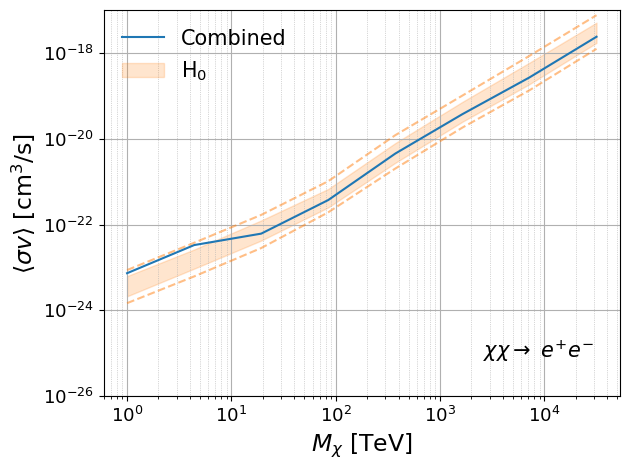

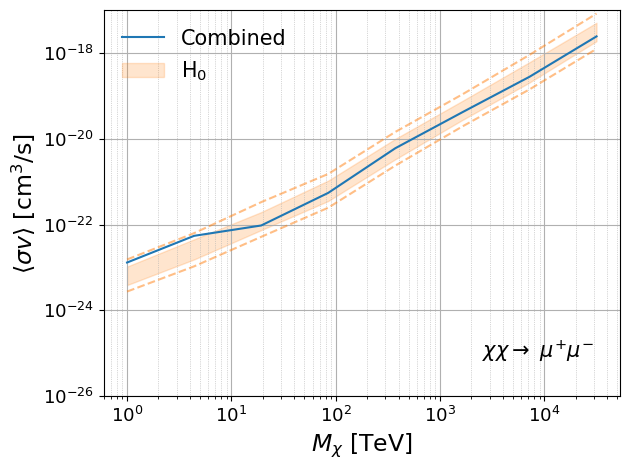

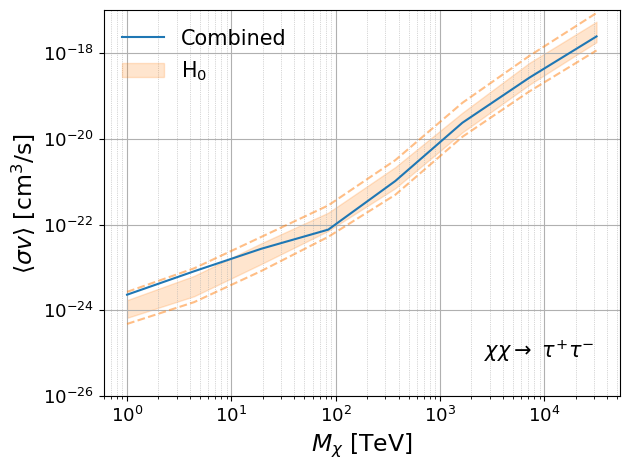

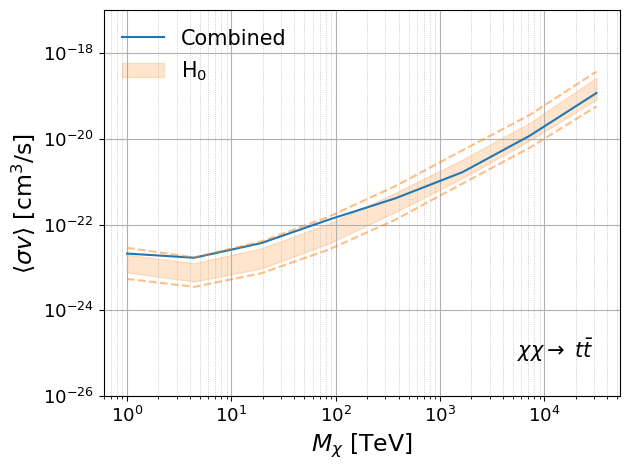

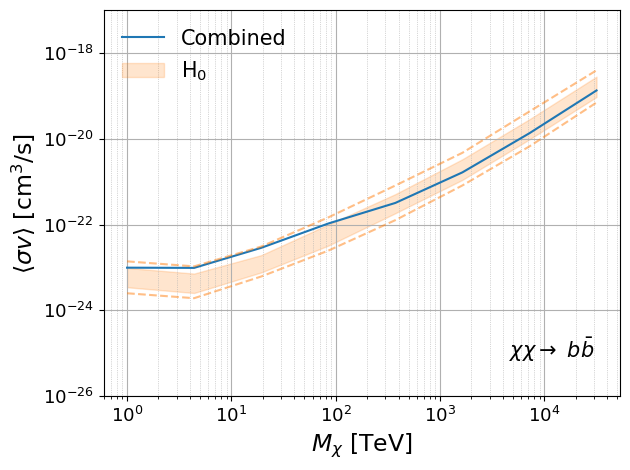

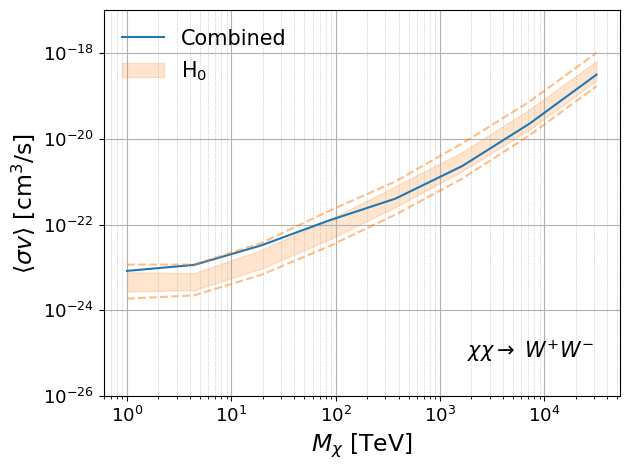

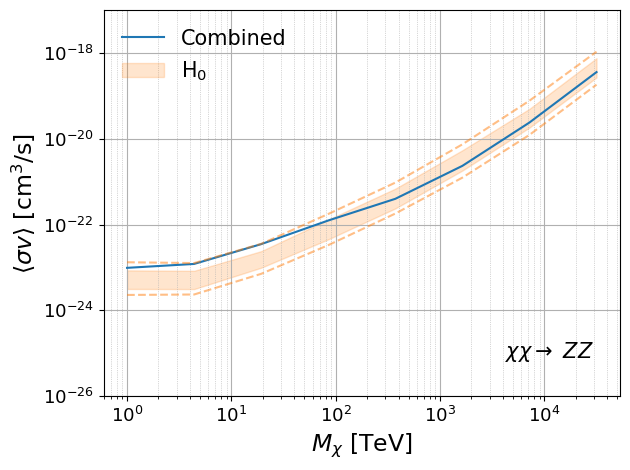

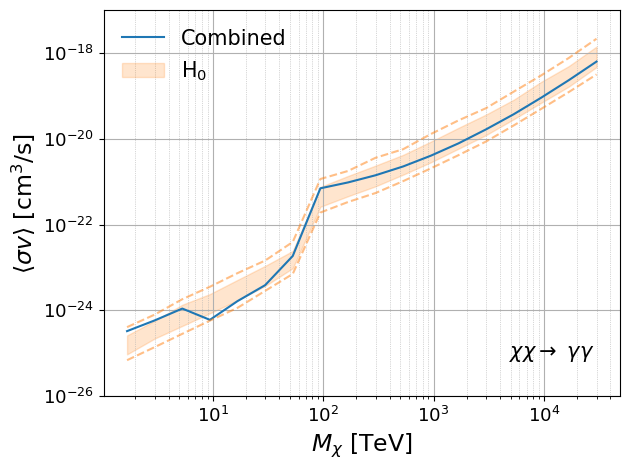

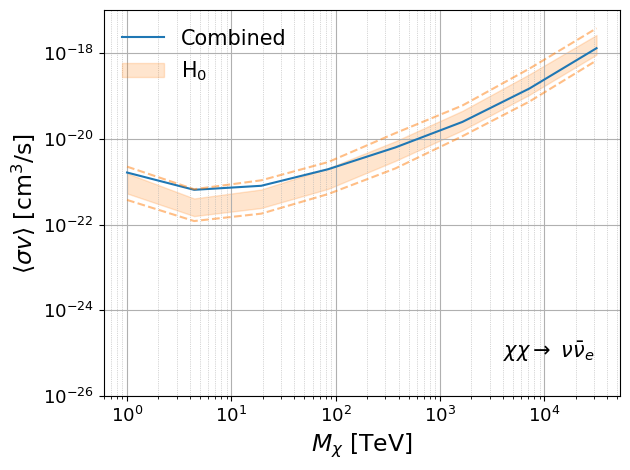

In [9]:
chan = ["ee", "uu", "tt", "ttbar", "bbar", "WW", "ZZ", "gamma", "nue"]

chan_lab = [r"$e^{+}e^{-}$", r"$\mu^{+}\mu^{-}$", r"$\tau^{+}\tau^{-}$",
            r"$t\bar{t}$", r"$b\bar{b}$",
            r"$W^{+}W^{-}$", r"$ZZ$", r"$\gamma\gamma$", r"$\nu \bar{\nu}_e$"]

for c, cl in zip(chan, chan_lab):
    plotULcurve(f"VEGAS_stacked_{c}_1D_null", label="Combined", units="TeV")
    plotExpULcurve(f"VEGAS_stacked_{c}_1D_null_exp", units="TeV", label=r"H$_0$")
    
    ax = plt.gca()
    plt.text(0.95, 0.1, r"$\chi\chi \rightarrow$ {}".format(cl), fontsize=15, ha="right", transform=ax.transAxes)
    plt.title("")
    plt.legend(loc=2, fontsize=15, frameon=False)
    plt.ylim(1e-26, 1e-17)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)

    plt.xlabel(r"$M_{\chi}$ [TeV]", fontsize=17)
    plt.ylabel(r"$\langle \sigma v \rangle$ [cm$^{3}$/s]", fontsize=17)
    plt.tight_layout()
    plt.savefig(f"VEGAS_exp_{c}.pdf")
    plt.show(block=False)

In [52]:
OUTPUT = "/Users/dtak/Research/DarkMatter/Output"

In [53]:
import numpy as np

In [54]:
ts = np.load(OUTPUT+"/VEGAS_stacked_nue_1D_null_exp_ts_exp.npy", allow_pickle=True).item()

In [55]:
"VEGAS_{d}_{c}_1D_null_ts.npy"

'VEGAS_{d}_{c}_1D_null_ts.npy'

In [56]:
ts_obs = np.load(OUTPUT+"/VEGAS_stacked_nue_1D_null_ts.npy")

In [57]:
ts_obs[-1][1]

-4.4261105358600616e-05

In [58]:
import matplotlib.pyplot as plt

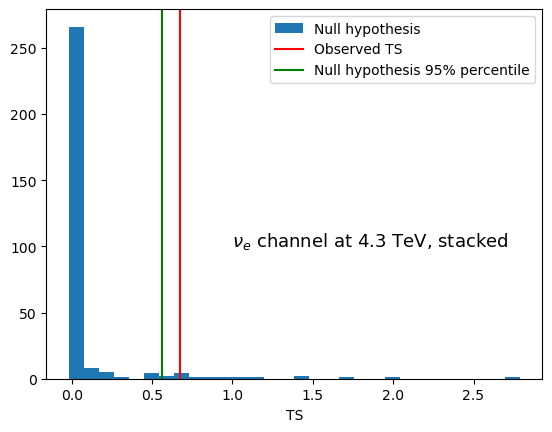

In [69]:
plt.hist(ts[4393.97056076079], bins=30, label="Null hypothesis")
plt.axvline(ts_obs[1][1], color="r", label="Observed TS")
plt.xlabel("TS")
plt.axvline(np.percentile(ts[4393.97056076079], 95), color="g", label="Null hypothesis 95% percentile")
plt.text(1, 100, r"$\nu_e$ channel at 4.3 TeV, stacked", fontsize=13)
plt.legend()

### Fig 3

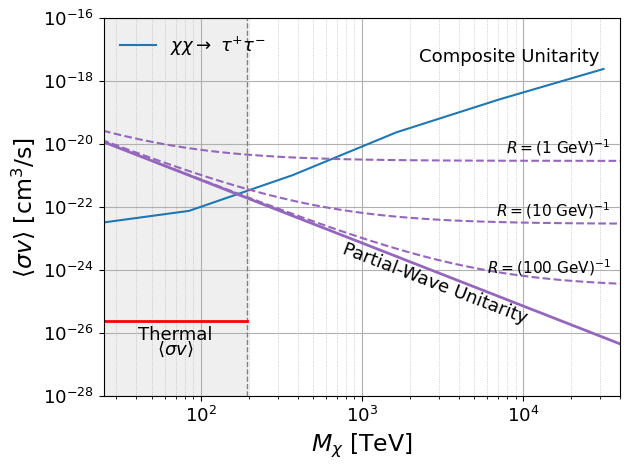

In [46]:
plotULcurve(f"VEGAS_stacked_tt_1D_null", label=r"$\chi\chi \rightarrow$ $\tau^{+}\tau^{-}$", units="TeV")
plotUnitarity()
plt.legend(fontsize=13, frameon=False, loc=2)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel(r"$M_{\chi}$ [TeV]", fontsize=17)
plt.ylabel(r'$\langle \sigma v \rangle$ [cm$^3$/s]',fontsize=17)
plt.title("")
plt.tight_layout()  
plt.savefig("UHDM_tt.pdf")

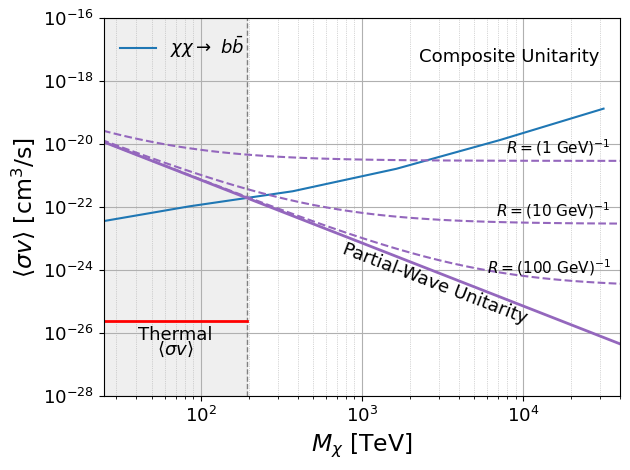

In [47]:
plotULcurve(f"VEGAS_stacked_bbar_1D_null", label=r"$\chi\chi \rightarrow$ $b\bar{b}$", units="TeV")
plotUnitarity()
plt.legend(fontsize=13, frameon=False, loc=2)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel(r"$M_{\chi}$ [TeV]", fontsize=17)
plt.ylabel(r'$\langle \sigma v \rangle$ [cm$^3$/s]',fontsize=17)
plt.title("")
plt.tight_layout()
plt.savefig("UHDM_bbar.pdf")

In [83]:
plt.style.use("default")

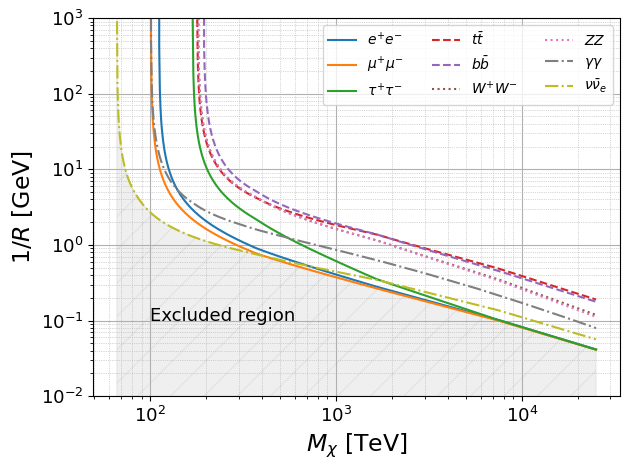

In [167]:
chan = ["ee", "uu", "tt", "ttbar", "bbar", "WW", "ZZ", "gamma", "nue"]

chan_lab = [r"$e^{+}e^{-}$", r"$\mu^{+}\mu^{-}$", r"$\tau^{+}\tau^{-}$",
            r"$t\bar{t}$", r"$b\bar{b}$",
            r"$W^{+}W^{-}$", r"$ZZ$", r"$\gamma\gamma$", r"$\nu \bar{\nu}_e$"]
chan_ls = ["-", "-", "-", "--", "--", ":",":", "-.", "-."]
vals = {}
for c, cl, ls in zip(chan, chan_lab, chan_ls):
    mx, my = plotUnitarityR(f"VEGAS_stacked_{c}_1D_null", label=cl, ls=ls)
    for x, y in zip(mx, my):
        if x in vals.keys():
            vals[x] = min(vals[x], y)
        else:
            vals[x] = y
x = np.array(list(vals.keys()))
x.sort()
y = []
for xv in x:
    y.append(vals[xv])
plt.fill_between(10**x,  y, np.zeros(len(y)), color=(0.8,0.8,0.8),alpha=0.3, hatch="/")
plt.text(100, 0.1, "Excluded region", fontsize=13)
plt.legend(ncol=3)
plt.ylim(1e-2, 1e3)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel(r"$M_{\chi}$ [TeV]", fontsize=17)
plt.ylabel(r'$1/R$ [GeV]',fontsize=17)
plt.tight_layout()
plt.savefig("MvsRinv_GeV.pdf")

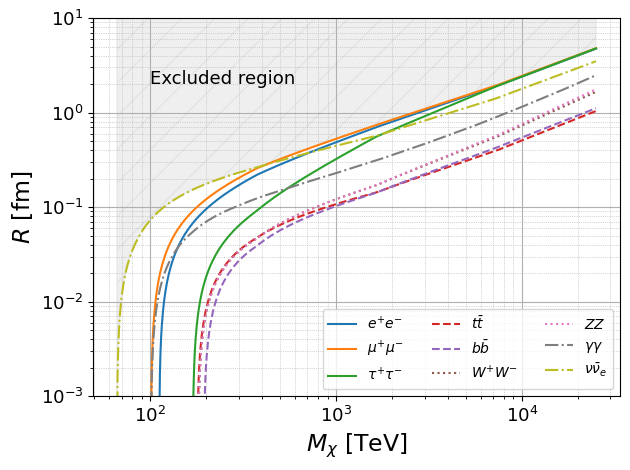

In [173]:
chan = ["ee", "uu", "tt", "ttbar", "bbar", "WW", "ZZ", "gamma", "nue"]

chan_lab = [r"$e^{+}e^{-}$", r"$\mu^{+}\mu^{-}$", r"$\tau^{+}\tau^{-}$",
            r"$t\bar{t}$", r"$b\bar{b}$",
            r"$W^{+}W^{-}$", r"$ZZ$", r"$\gamma\gamma$", r"$\nu \bar{\nu}_e$"]
chan_ls = ["-", "-", "-", "--", "--", ":",":", "-.", "-."]
vals = {}
for c, cl, ls in zip(chan, chan_lab, chan_ls):
    mx, my = plotUnitarityR(f"VEGAS_stacked_{c}_1D_null", label=cl, ls=ls, inv=False, units="fm")
    for x, y in zip(mx, my):
        if x in vals.keys():
            if y<10:
                vals[x] = max(vals[x], y)
        else:
            if y<10:
                vals[x] = y

x = np.array(list(vals.keys()))
x.sort()
y = []
for xv in x:
    y.append(vals[xv])
plt.fill_between(10**x,  y, np.ones(len(y))*100, color=(0.8,0.8,0.8),alpha=0.3, hatch="/")
plt.text(100, 2, "Excluded region", fontsize=13)
plt.ylim(1e-3, 10)
plt.legend(ncol=3, loc=4)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel(r"$M_{\chi}$ [TeV]", fontsize=17)
plt.ylabel(r'$R$ [fm]',fontsize=17)
plt.tight_layout()
plt.savefig("MvsR_fm.pdf")

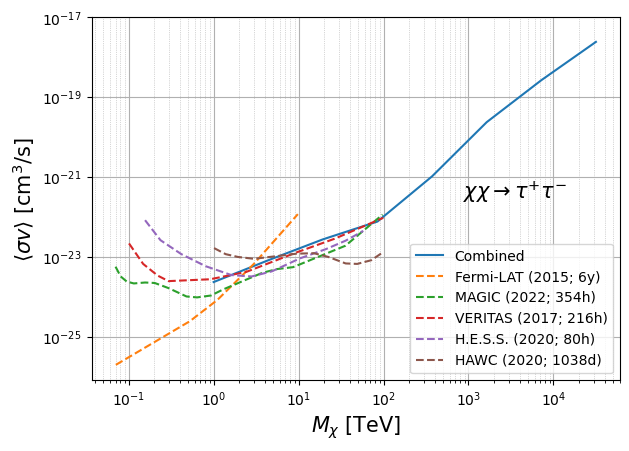

In [15]:

plotULcurve(f"VEGAS_stacked_tt_1D_null", label="Combined", units="TeV")
plotPublication("tt", units="TeV")
plt.tight_layout()
plt.title("")
plt.ylim(8e-27, 1e-17)
plt.savefig("combined_tt.pdf")

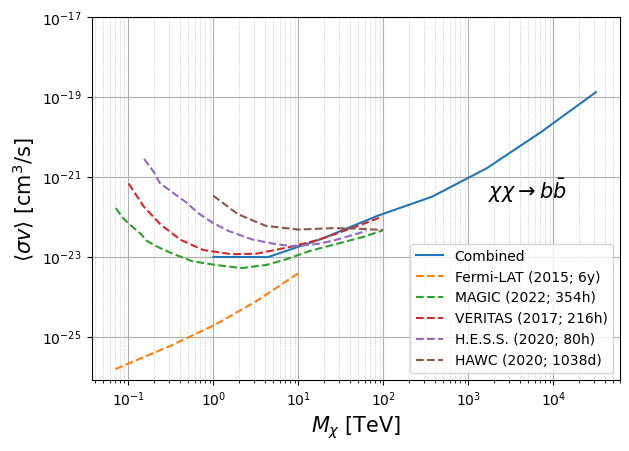

In [16]:
plotULcurve(f"VEGAS_stacked_bbar_1D_null", label="Combined", units="TeV")
plotPublication("bbar", units="TeV")
plt.tight_layout()
plt.title("")
plt.ylim(8e-27, 1e-17)
plt.savefig("combined_bbar.pdf")

## Fig sub

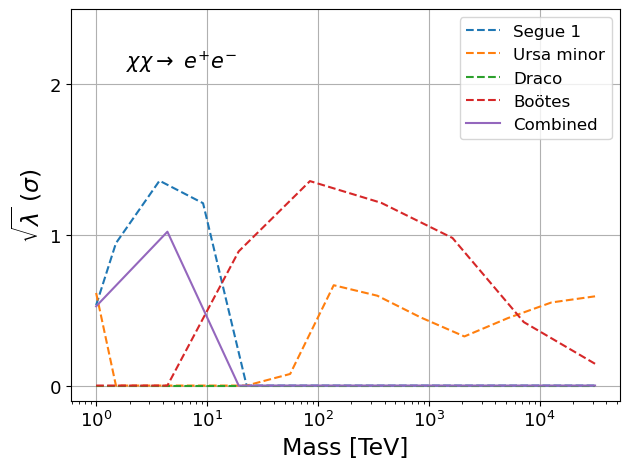

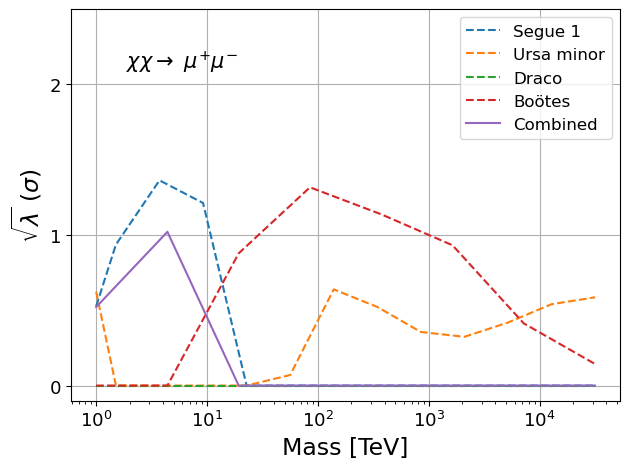

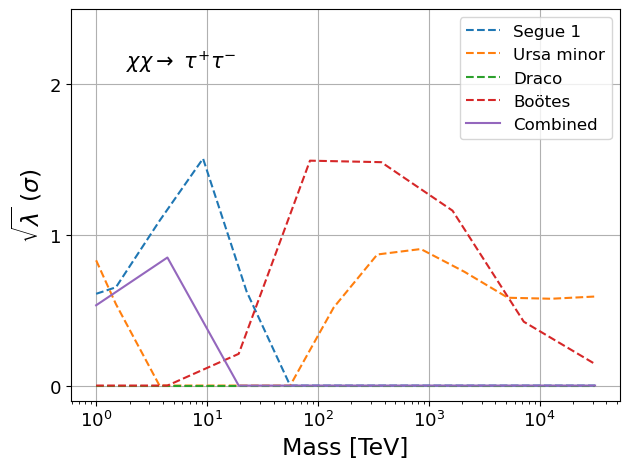

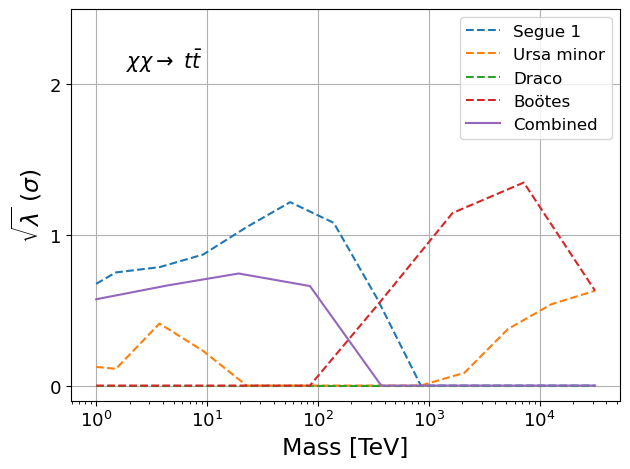

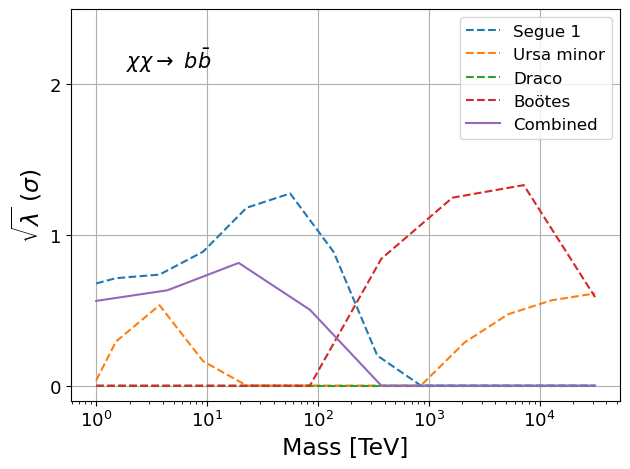

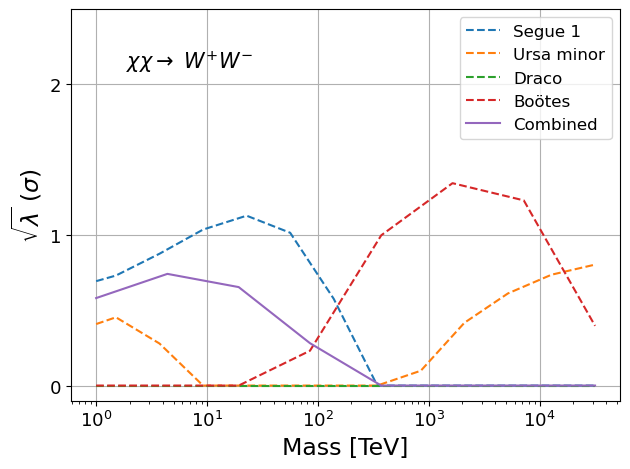

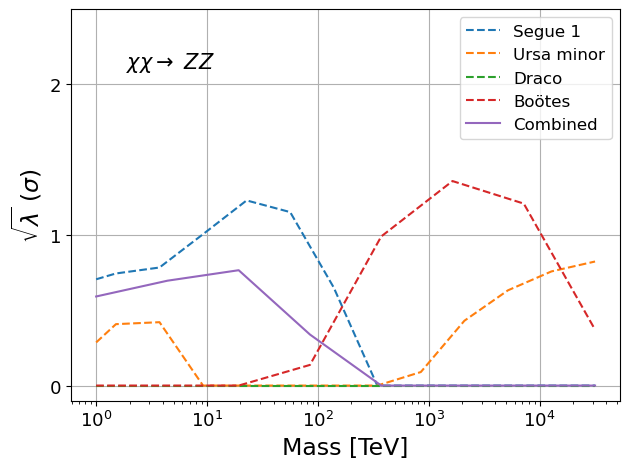

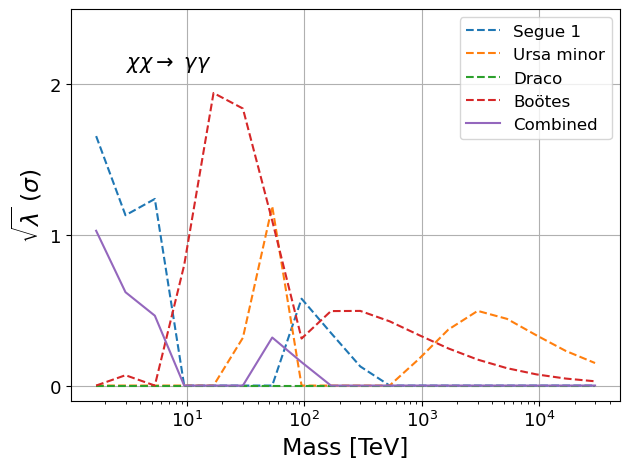

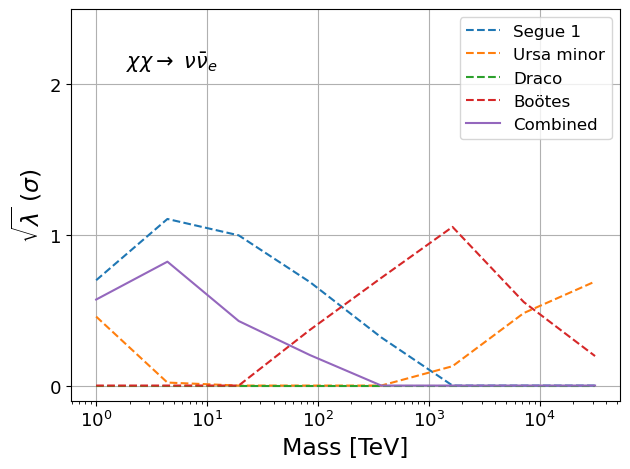

In [30]:

chan = ["ee", "uu", "tt", "ttbar", "bbar", "WW", "ZZ", "gamma", "nue"]

chan_lab = [r"$e^{+}e^{-}$", r"$\mu^{+}\mu^{-}$", r"$\tau^{+}\tau^{-}$",
            r"$t\bar{t}$", r"$b\bar{b}$",
            r"$W^{+}W^{-}$", r"$ZZ$", r"$\gamma\gamma$", r"$\nu \bar{\nu}_e$"]

OUTPUT_DIR = "/Users/dtak/Research/DarkMatter/Output/"
for c, cl in zip(chan, chan_lab):
    for d, dl in zip(["segue_1", "ursa_minor", "draco", "bootes", "stacked"], 
                     ["Segue 1", "Ursa minor", "Draco", "Boötes", "Combined"]):
        try:
            ts = np.load(OUTPUT_DIR+f"VEGAS_{d}_{c}_1D_null_ts.npy")
        except:
            try:
                ts = np.load(OUTPUT_DIR+f"VEGAS_{d}_{c}_1D_null_pt_ts.npy")
            except:
                try:
                    ts = np.load(OUTPUT_DIR+f"VEGAS_{d}_{c}_1D_null_ptts.npy")
                except:
                    try:
                        ts = np.load(OUTPUT_DIR+f"VEGAS_{d}_{c}_1D_nullts.npy")
                    except:
                        print("missing", d, c)
                        continue
                        
        ts[:,1][ts[:,1]<0] = 0
        
        if dl == "Combined":
            plt.plot(ts[:,0]/1e3, np.sqrt(ts[:,1]), label=dl)
        else:
            plt.plot(ts[:,0]/1e3, np.sqrt(ts[:,1]), label=dl, ls="--")
        plt.xscale("log")

    plt.legend(loc=1, fontsize=12)
    ax = plt.gca()
    plt.text(0.1, 0.85, r"$\chi\chi \rightarrow$ {}".format(cl), fontsize=15, ha="left", transform=ax.transAxes)
    plt.xlabel("Mass [TeV]", fontsize=17)
    plt.ylabel(r"$\sqrt{\lambda}$ ($\sigma$)", fontsize=17)
    
    plt.yticks([0, 1, 2])
    plt.ylim(-0.1, 2.5)
    plt.grid()
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.tight_layout()
    plt.savefig(f"sig_{c}.pdf")
    plt.show(block=False)

In [25]:
ts_obs[1][0]

4393.97056076079

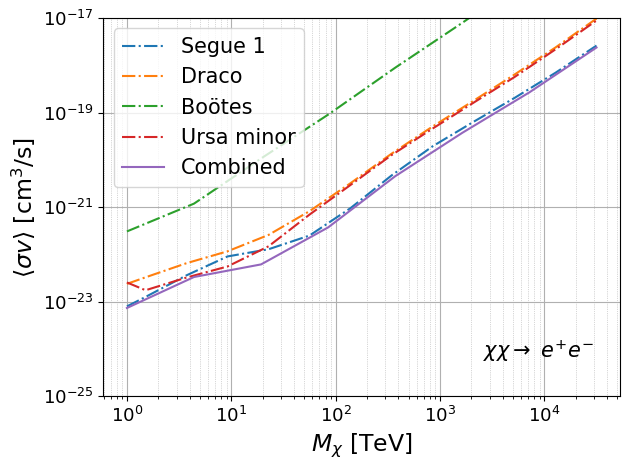

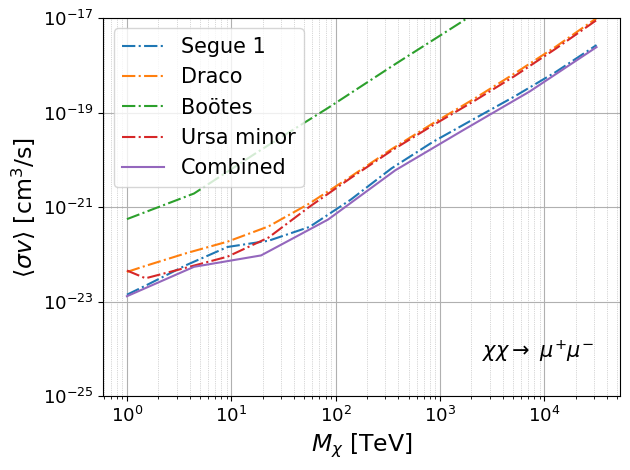

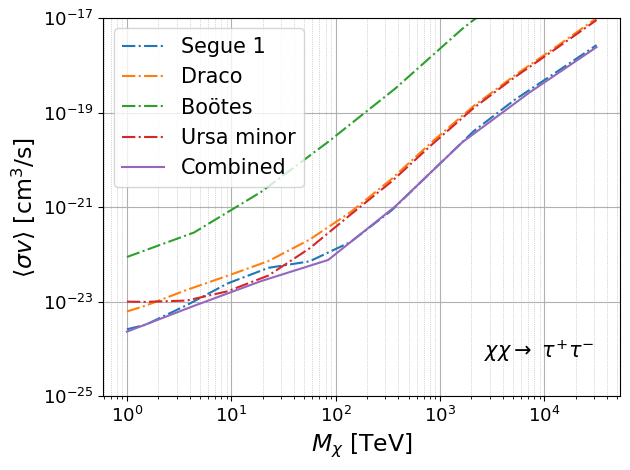

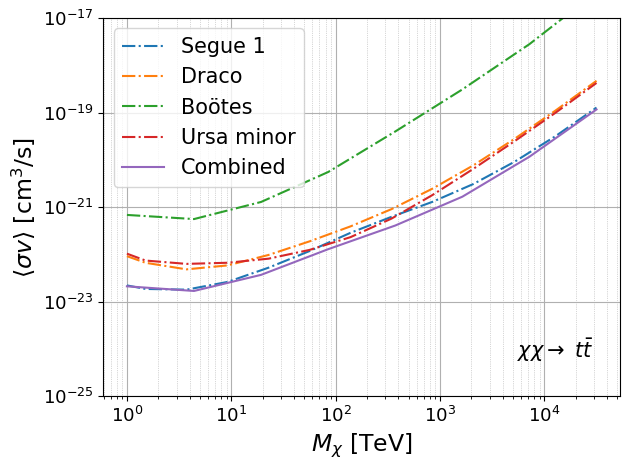

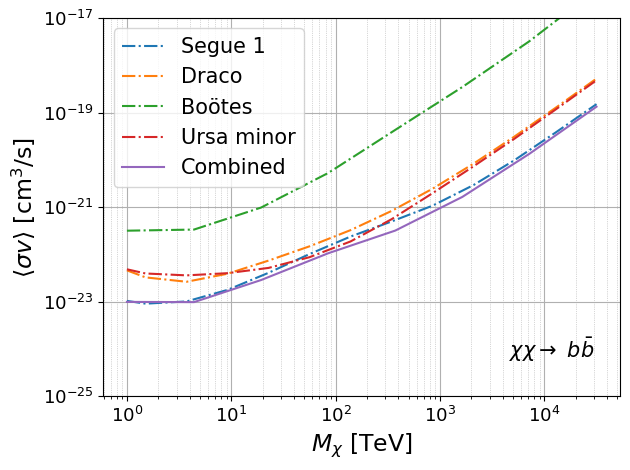

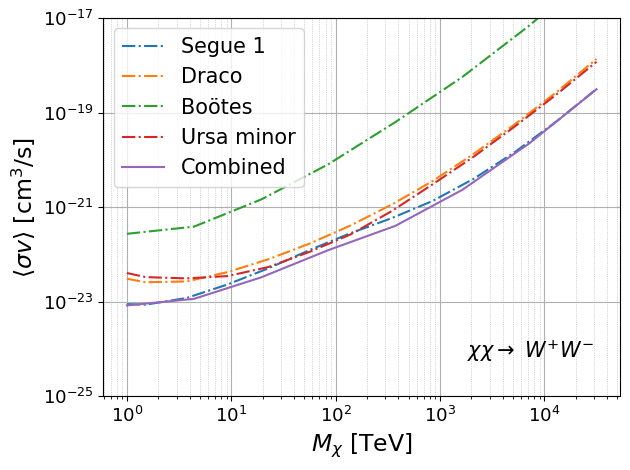

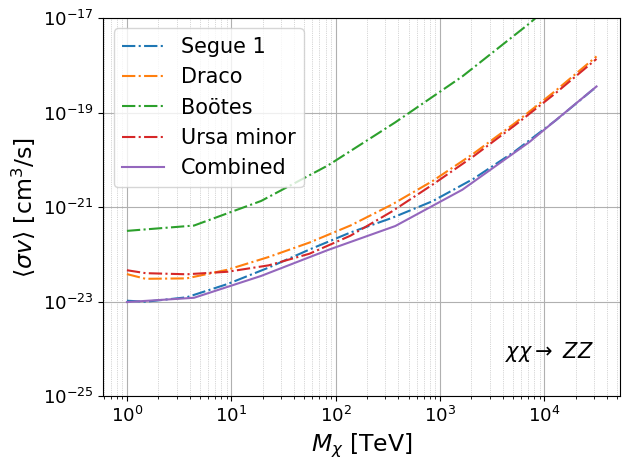

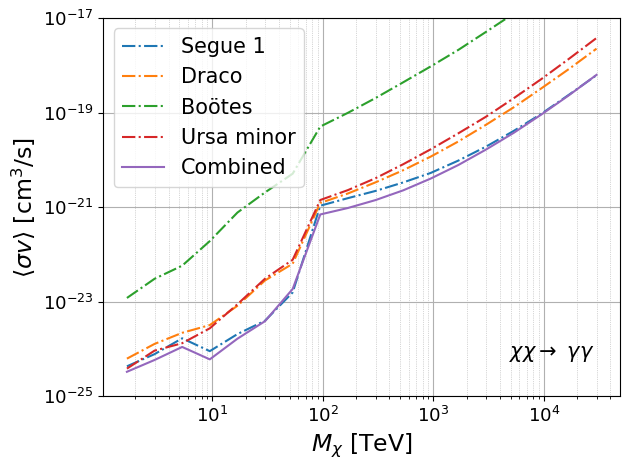

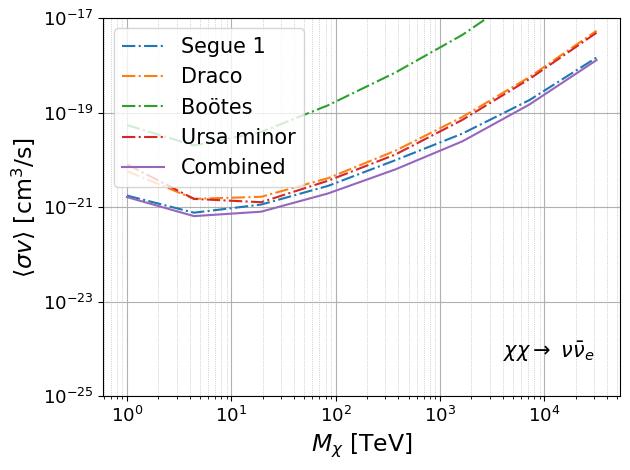

In [17]:
chan = ["ee", "uu", "tt", "ttbar", "bbar", "WW", "ZZ", "gamma", "nue"]

chan_lab = [r"$e^{+}e^{-}$", r"$\mu^{+}\mu^{-}$", r"$\tau^{+}\tau^{-}$",
            r"$t\bar{t}$", r"$b\bar{b}$",
            r"$W^{+}W^{-}$", r"$ZZ$", r"$\gamma\gamma$", r"$\nu \bar{\nu}_e$"]

for c, cl in zip(chan, chan_lab):
    plotULcurve(f"VEGAS_segue_1_{c}_1D_null_pt", label="Segue 1", ls="-.", units="TeV")
    plotULcurve(f"VEGAS_draco_{c}_1D_null_pt", label="Draco", ls="-.", units="TeV")
    plotULcurve(f"VEGAS_bootes_{c}_1D_null_pt", label="Boötes", ls="-.", units="TeV")
    plotULcurve(f"VEGAS_ursa_minor_{c}_1D_null_pt", label="Ursa minor", ls="-.", units="TeV")
    plotULcurve(f"VEGAS_stacked_{c}_1D_null", label="Combined", units="TeV")
    plt.ylim(1e-25, 1e-17)
    plt.legend(loc=2, fontsize=15)
    ax = plt.gca()
    plt.text(0.95, 0.1, r"$\chi\chi \rightarrow$ {}".format(cl), fontsize=15, ha="right", transform=ax.transAxes)
    #plt.text(0.95, 0.2, r"Segue 1", fontsize=15, ha="right", transform=ax.transAxes)
    plt.title("")
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel(r"$M_{\chi}$ [TeV]", fontsize=17)
    plt.ylabel(r"$\langle \sigma v \rangle$ [cm$^{3}$/s]", fontsize=17)
    plt.tight_layout()
    plt.savefig(f"VEGAS_{c}.pdf")
    plt.show(block=False)
    

In [59]:
for d in ["segue_1", "draco", "bootes", "ursa_minr", "stacked"]:
    for c, cl in zip(chan, chan_lab):
        os.system(f"cp {const.OUTPUT_DIR}/VEGAS_stacked_{c}_1D_null_exp.npy {const.OUTPUT_DIR}/data/VEGAS_stacked_{c}_1D_null_exp.npy")

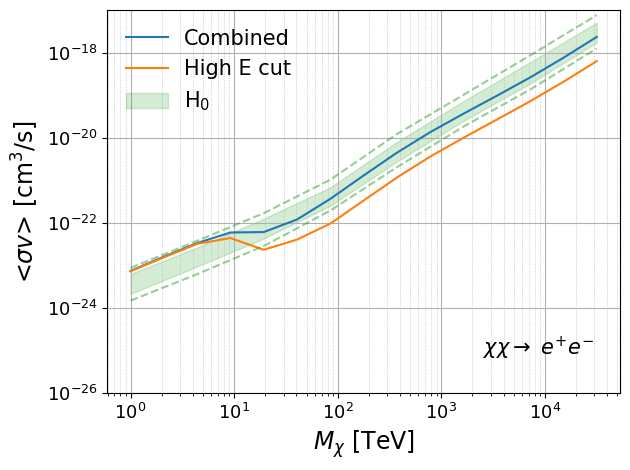

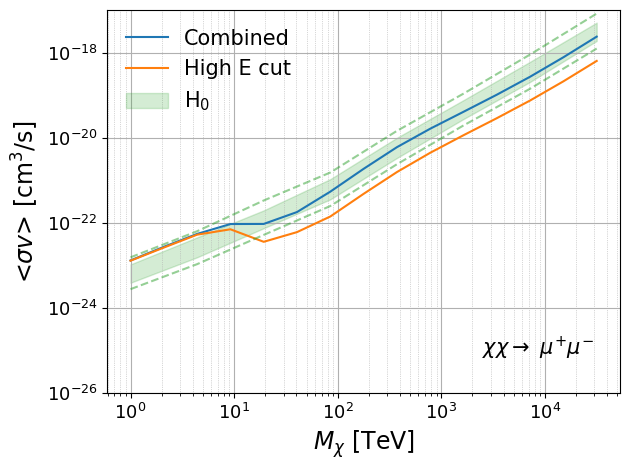

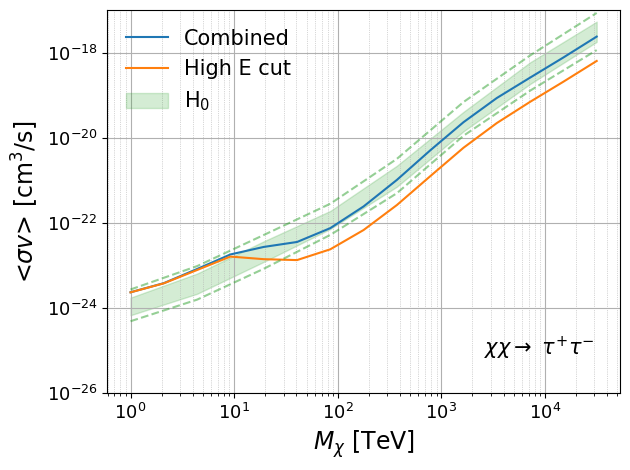

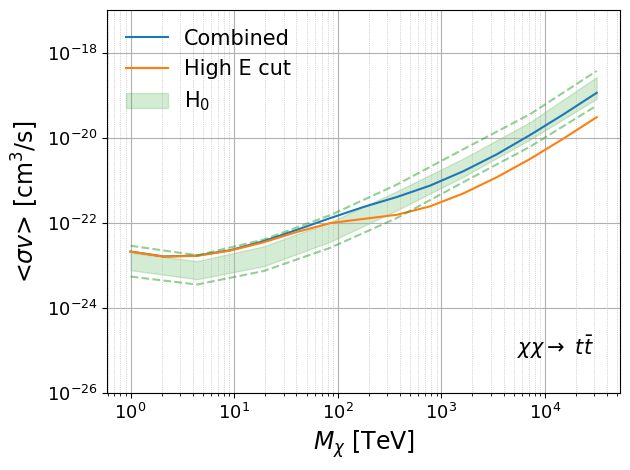

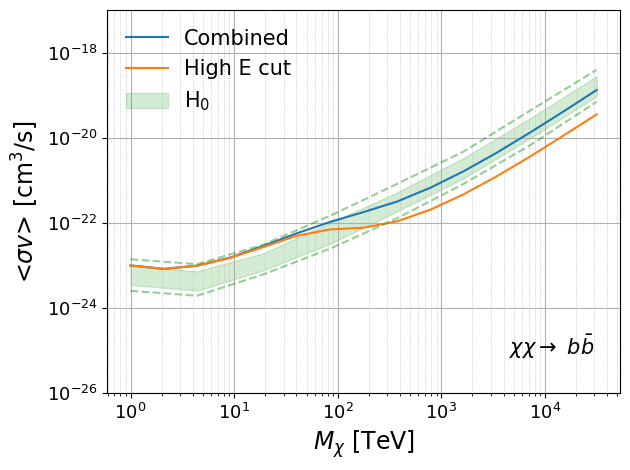

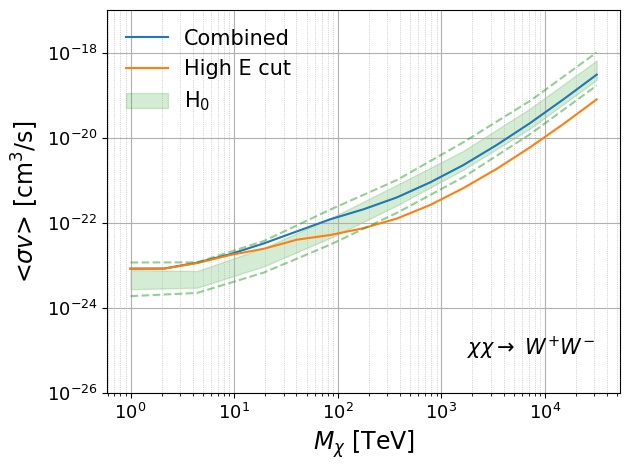

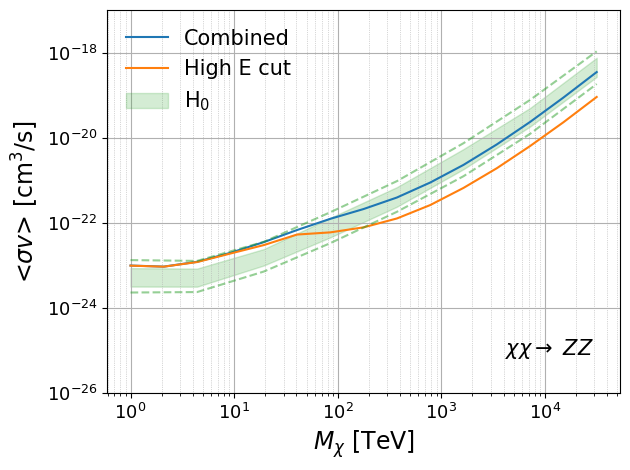

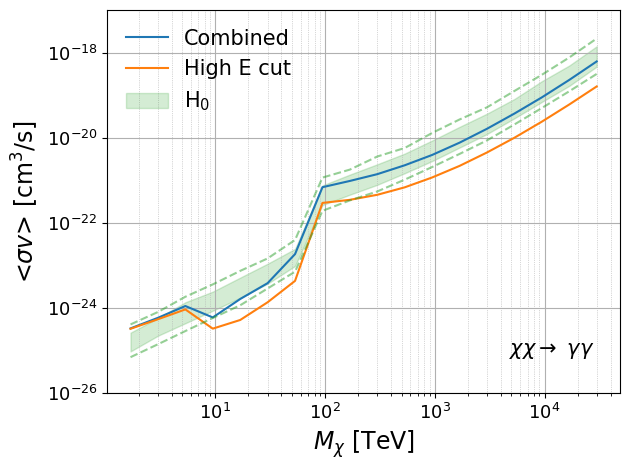

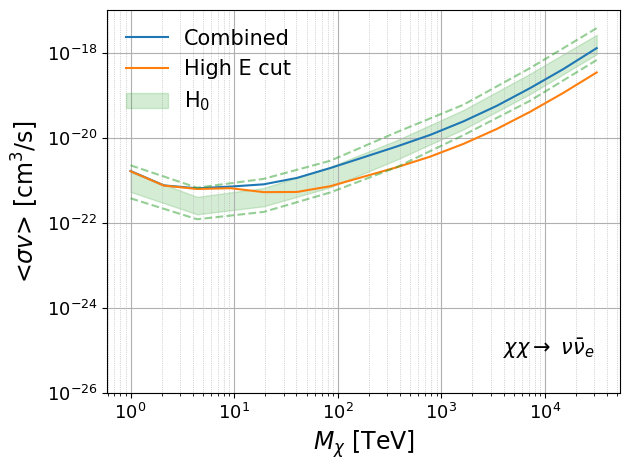

In [32]:
chan = ["ee", "uu", "tt", "ttbar", "bbar", "WW", "ZZ", "gamma", "nue"]

chan_lab = [r"$e^{+}e^{-}$", r"$\mu^{+}\mu^{-}$", r"$\tau^{+}\tau^{-}$",
            r"$t\bar{t}$", r"$b\bar{b}$",
            r"$W^{+}W^{-}$", r"$ZZ$", r"$\gamma\gamma$", r"$\nu \bar{\nu}_e$"]

for c, cl in zip(chan, chan_lab):
    Likelihood.plotULcurve(f"with_segue1_{c}", label="Combined", units="TeV")
    Likelihood.plotULcurve(f"with_segue1_{c}_mcut", units="TeV", label=r"High E cut")
    Likelihood.plotExpULcurve(f"VEGAS_stacked_{c}_1D_null_exp", units="TeV", label=r"H$_0$")
    
    ax = plt.gca()
    plt.text(0.95, 0.1, r"$\chi\chi \rightarrow$ {}".format(cl), fontsize=15, ha="right", transform=ax.transAxes)
    plt.title("")
    plt.legend(loc=2, fontsize=15, frameon=False)
    plt.ylim(1e-26, 1e-17)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)

    plt.xlabel(r"$M_{\chi}$ [TeV]", fontsize=17)
    plt.ylabel(r"<$\sigma v$> [cm$^{3}$/s]", fontsize=17)
    plt.tight_layout()
    plt.savefig(f"VEGAS_Ecut_{c}.png")
    plt.show(block=False)